# Regresión logística

In [80]:
import os.path
os.chdir('c:\\Users\\aesca\\Documents\\TEC\\Académico\\7mo semestre\\Reto_Titanic_TC3006C\\')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
import warnings
warnings.filterwarnings('ignore')

# Load train data using os path
# train = pd.read_csv('./data/train_clean.csv')
train = pd.read_csv('./data/train/train_clean.csv')
# Load test data
test = pd.read_csv('./data/test/test_clean.csv')

# Drop the columns that are not needed in the train dataset
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Drop the columns that are not needed in the test dataset
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']

# # Drop 'Age' column
# x_train = x_train.drop('Age', axis=1)
# x_test = x_test.drop('Age', axis=1)

# Drop 'PassengerId' column
x_train = x_train.drop('PassengerId', axis=1)
x_test = x_test.drop('PassengerId', axis=1)

# Print cols of each train and test dataset
print(x_train.columns)
if len(x_train.columns) == len(x_test.columns):
    print('✓ Ambos datasets tienen la misma cantidad de columnas')


Index(['Age', 'Fare', 'Embarked_Cherbourg', 'Embarked_Queenstown',
       'Embarked_Southampton', 'Alone', 'Large', 'Medium', 'Small', 'Female',
       'Male', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'FemaleAge2', 'MaleAge6'],
      dtype='object')
✓ Ambos datasets tienen la misma cantidad de columnas


In [81]:
# Use GridSearchCV to find best parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1., 10.],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', solver='liblinear'), param_grid, cv=5, scoring='precision')
grid_search.fit(x_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

# Print True Positive, False Positive, True Negative, False Negative as variables
y_pred = grid_search.predict(x_train)
confusion_matrix_1 = confusion_matrix(y_train, y_pred)
print(f'True Positive: {confusion_matrix_1[1][1]}')
print(f'False Positive: {confusion_matrix_1[0][1]}')
print(f'True Negative: {confusion_matrix_1[0][0]}')
print(f'False Negative: {confusion_matrix_1[1][0]}')
print(f'Precision: {(precision_score(y_train, y_pred).round(2))*100}%')

# Delete variable y_pred
del y_pred

Best parameters: {'C': 10.0, 'penalty': 'l1'}
True Positive: 264
False Positive: 87
True Negative: 462
False Negative: 76
Precision: 75.0%


Precision: 81.0%
Accuracy: 90.0%


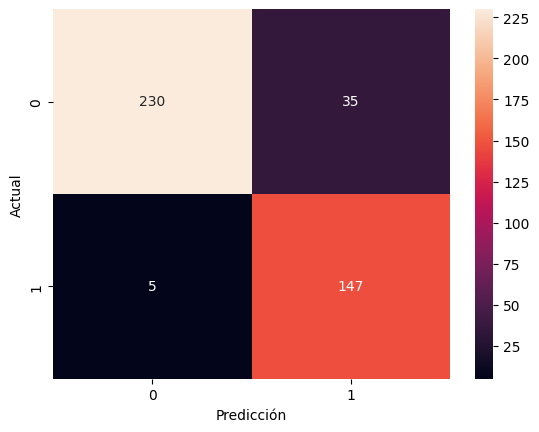

In [82]:
# Predict with best parameters
y_pred = grid_search.predict(x_test)
precision = grid_search.score(x_test, y_test)
print(f'Precision: {precision.round(2)*100}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy.round(2)*100}%')


# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

In [83]:
# Print model coefficients and the variable names to see which variables are important
coef = grid_search.best_estimator_.coef_
cols = x_train.columns
# Combine the two arrays into a dataframe
coef_df = pd.DataFrame(coef, columns=cols)
coef_df

,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male,Pclass_1,Pclass_2,Pclass_3,FemaleAge2,MaleAge6
0,-0.024969,0.00343,0.094405,0.0,-0.322612,0.573956,-1.582713,-2.44827,0.516345,2.337855,-0.589944,1.085266,0.0,-0.747108,-0.756949,3.027357


In [84]:
# Fill a model predict with a male with an age of 25 that paid 100 for the ticket, traveled in Pclass 1 and embarked from Cherbourg, it should have 9 features
print(grid_search.predict([[3, 32, 56, 0, 0, 1, 1, 0, 0, 0, 0, 1]]))

ValueError: X has 12 features, but LogisticRegression is expecting 16 features as input.

In [77]:
# Pclass = 1, male check if survived in train
variable = train[(train['Male'] == 1)&(train['Survived'] == 1)&(train['Pclass'] == 3) & (train['Alone'] == 1)]
print(len(variable))
variable

32


,PassengerId,Survived,Pclass,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male
36,37,1,3,47.0,7.2292,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
73,75,1,3,32.0,56.4958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
80,82,1,3,29.0,9.5000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
106,108,1,3,47.0,7.7750,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
126,128,1,3,24.0,7.1417,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
145,147,1,3,27.0,7.7958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
203,205,1,3,18.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
206,208,1,3,26.0,18.7875,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
219,221,1,3,16.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
270,272,1,3,25.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [78]:
# Run section only if 'titanic_tree.pdf' is not in the directory

if not os.path.exists('titanic_tree.pdf'):
    # Decision Tree Clasiifier with graphviz
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.tree import export_graphviz
    import graphviz

    # Create a Decision Tree Classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(x_train, y_train)

    # Plot the tree with graphviz
    dot_data = export_graphviz(clf, out_file=None, feature_names=x_train.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render('titanic_tree')
    graph.view()